In [2]:
import csv

import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Especifique cada caminho

In [3]:
dataset = 'model/keypoint_classifier/sinal_treino.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Configuração do número de classificação

In [4]:
# Quantidade de Sinais cadastrados
QUANTIDADE_SINAIS_CADASTRADOS = 0

# Carregar dados de aprendizagem

In [5]:
X_dataset = np.loadtxt(
    dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(
    dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# construção de modelo

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(QUANTIDADE_SINAIS_CADASTRADOS, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Callback de ponto de verificação do modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback para interrupção antecipada
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# treinamento de modelo

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2344 - loss: 2.2164
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1927 - loss: 2.1841 - val_accuracy: 0.2674 - val_loss: 1.8895
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2031 - loss: 1.9417
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2423 - loss: 1.9148 - val_accuracy: 0.3375 - val_loss: 1.8005
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2734 - loss: 1.8353
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2909 - loss: 1.8142 - val_accuracy: 0.3442 - val_loss: 1.7170
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2969 - loss: 1.7095
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


In [13]:
# avaliação do modelo
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9534 - loss: 0.3048 


In [14]:
# Carrega o modelo salvo
model = tf.keras.models.load_model(model_save_path)

ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.adam.Adam object at 0x0000020D1B484110>:

'Unable to synchronously open object (message not aligned)'

List of objects that could not be loaded:
[<keras.src.optimizers.adam.Adam object at 0x0000020D1B484110>]

In [ ]:
# Teste de raciocínio
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[9.2993003e-01 6.7907974e-02 1.4339792e-05 9.2292368e-07 2.0813695e-03
 6.5360262e-05]
0


# Linhas mistas

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


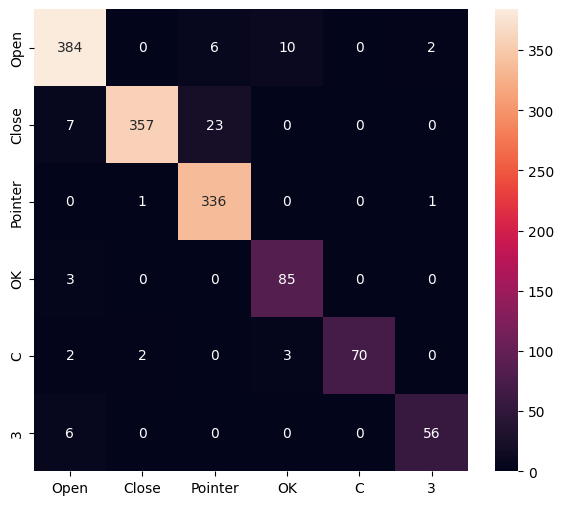

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       402
           1       0.99      0.92      0.96       387
           2       0.92      0.99      0.96       338
           3       0.87      0.97      0.91        88
           4       1.00      0.91      0.95        77
           5       0.95      0.90      0.93        62

    accuracy                           0.95      1354
   macro avg       0.95      0.94      0.94      1354
weighted avg       0.95      0.95      0.95      1354



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    with open('model/keypoint_classifier/sinal_label.csv',
            encoding='utf-8-sig') as f:
        keypoint_classifier_labels = csv.reader(f)
        keypoint_classifier_labels = [
            row[0] for row in keypoint_classifier_labels
        ]
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    labels = [keypoint_classifier_labels[i] for i in sorted(list(set(y_true)))]
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Converter para modelo para Tensorflow-Lite

In [ ]:
# Salva como modelo apenas para inferência
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Converter modelo (quantizar)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ARTHUR~1\AppData\Local\Temp\tmp5px7e4zv\assets


INFO:tensorflow:Assets written to: C:\Users\ARTHUR~1\AppData\Local\Temp\tmp5px7e4zv\assets


Saved artifact at 'C:\Users\ARTHUR~1\AppData\Local\Temp\tmp5px7e4zv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2550835144528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550835145680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550835145872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550835146640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550835146832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2550835147600: TensorSpec(shape=(), dtype=tf.resource, name=None)


6624

# Teste de raciocínio

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
#obtém o tensor de entrada/saída
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Realizar inferência
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.2993003e-01 6.7908004e-02 1.4339777e-05 9.2292191e-07 2.0813695e-03
 6.5360131e-05]
0
